In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
#因為這裡的圖示灰階,一個channel, 所以(28,28)-->(28,28,1)
#如果圖是彩色的，那可能就是3個channel

In [8]:
x_train = x_train.reshape(60000,28,28,1)/255

In [9]:
x_test = x_test.reshape(10000,28,28,1)/255

In [10]:
x_train[87].shape 

(28, 28, 1)

In [11]:
y_train[87] 

9

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
y_train[87] 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# 讀入必要的函式

In [17]:
from tensorflow.keras.models import Sequential #空白函數學習機
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

# Step1 打造函數學習機(CNN)

In [18]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), padding='same', input_shape=(28,28,1), activation='relu'))

In [ ]:
#16張記分板 ，每個都是28*28的矩陣
#16張記分板疊在一起，事實上是(28,28,16)

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
#(14,14,16)

In [23]:
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))

In [24]:
#ouput(14,14,32)

In [25]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [26]:
#output(7,7,32)

In [27]:
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))

In [28]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [39]:
#output會變多少呢？ 砍出來會變output(3,3,64)

In [30]:
model.add(Flatten())

In [31]:
model.add(Dense(54, activation='relu'))

In [33]:
model.add(Dense(10, activation='softmax')) #最後神經元10個且softmax:10個數合起來為1

# 看一下我們的神經網路

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [36]:
#3*3（權重）＋1 (bias)
(3*3+1)*16

160

In [38]:
(3*3*16+1)*32

4640

In [41]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

# Step2 fit

In [42]:
model.fit(x_train, y_train, batch_size=128, epochs=12)

Train on 60000 samples
Epoch 1/12
60000/60000 [==============================] - 46s 774us/sample - loss: 0.0897 - accuracy: 0.1545
Epoch 2/12
60000/60000 [==============================] - 42s 699us/sample - loss: 0.0886 - accuracy: 0.3268
Epoch 3/12
60000/60000 [==============================] - 45s 752us/sample - loss: 0.0835 - accuracy: 0.4687
Epoch 4/12
60000/60000 [==============================] - 45s 755us/sample - loss: 0.0408 - accuracy: 0.7584
Epoch 5/12
60000/60000 [==============================] - 46s 768us/sample - loss: 0.0182 - accuracy: 0.8843
Epoch 6/12
60000/60000 [==============================] - 44s 732us/sample - loss: 0.0136 - accuracy: 0.9116
Epoch 7/12
60000/60000 [==============================] - 44s 732us/sample - loss: 0.0111 - accuracy: 0.9285
Epoch 8/12
60000/60000 [==============================] - 42s 697us/sample - loss: 0.0095 - accuracy: 0.9388
Epoch 9/12
60000/60000 [==============================] - 44s 731us/sample - loss: 0.0085 - accuracy: 0.9

# Step3 預測

In [43]:
result = model.predict_classes(x_test)

In [45]:
def my_predict(n):
    print('我可愛的CNN預測是' , result[n])
    X = x_test[n].reshape(28,28)
    plt.imshow(X, cmap='Greys')

我可愛的CNN預測是 6


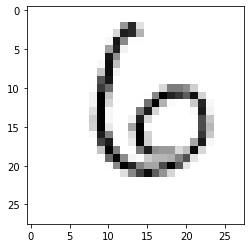

In [48]:
my_predict(100)

In [49]:
from ipywidgets import interact_manual

In [50]:
interact_manual(my_predict, n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [ ]:
model.evaluate

In [ ]:
loss, acc = score

In [ ]:
print('測試資料的正確率'acc)

# 把我們的model(test資料)存回來

In [54]:
model.save('myCNNmodel.h5')